# CIGRE European Low Voltage Industrial Network

In [1]:
try:
    import pydae
except:
    print('pydae is not installed, installing')
    !pip install pydae --quiet
import pydae 
pydae.__version__

'0.54.1'

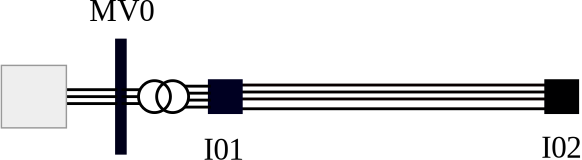

In [2]:
from IPython.core.display import HTML,SVG
SVG('https://tinyurl.com/cigreind')

## Model building

In [3]:
data = {
"system":{"S_base":1e6, "K_p_agc":0.01, "K_i_agc":0.01, "K_xif":0.01},
"buses":[
         {"name": "MV0",  "pos_x":   0, "pos_y":   0, "units": "m", "U_kV":20.0, "N_nodes":3, "phi_deg_0":30.0},
         {"name": "I01",  "pos_x":  90, "pos_y":   0, "units": "m", "U_kV":0.4},
         {"name": "I02",  "pos_x": 150, "pos_y":   0, "units": "m", "U_kV":0.4}
        ], 
"transformers":[
        {"bus_j": "MV0",  "bus_k": "I01",  "S_n_kVA": 100, "U_j_kV":20, "U_k_kV":0.4,
         "R_cc_pu": 0.01, "X_cc_pu":0.04, "connection": "Dyn11",   "conductors_j": 3, "conductors_k": 4,
         "monitor":True}
       ],
"lines":[
        { "bus_j": "I01",  "bus_k": "I02",  "code":   "UG2", "m": 100.0, "monitor":True, "sym":False}
        ],
"loads":[
         { "bus": "I02" , "kVA": 100.0, "pf": 0.85, "type":"3P+N", "model":"ZIP"}
        ],
"shunts":[
        {"bus": "I01" , "R":  3.0, "X": 0.0, "bus_nodes": [3]}
         ],
"sources":[
       {"type":"ac3ph3w_ideal", "bus": "MV0", "S_n":100e3, "U_n" :20e3, "R":0.01, "X":0.1}
           ],
"line_codes":
        {
        "UG2":
            {"R":[ [0.314, 0.049, 0.049, 0.049], 
                    [0.049, 0.314, 0.049, 0.049], 
                    [0.049, 0.049, 0.314, 0.049], 
                    [0.049, 0.049, 0.049, 0.314]], 
            "X":[[0.762, 0.687, 0.665, 0.687],
                    [0.687, 0.762, 0.687, 0.665],
                    [0.665, 0.687, 0.762, 0.687],
                    [0.687, 0.665, 0.687, 0.762]], "I_max":200.0
                    },
        }
}

In [4]:
from pydae.urisi.urisi_builder import urisi

grid = urisi(data)
grid.uz_jacs = False
grid.build('cigre_eu_lv_ind')

KeyboardInterrupt: 

## Model use

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML,SVG

In [ ]:
import cigre_eu_lv_ind
from pydae.urisi.utils import report_v
from pydae.urisi.utils import get_v, get_i
from pydae.urisi.utils.model2svg import model2svg

### Initialization and power flow

In [ ]:
model = cigre_eu_lv_ind.model()
model.ini({},'xy_0.json')
model.report_z()

i_l_I01_0_I02_0_r = 148.61
i_l_I01_0_I02_0_i = -5.19
i_l_I01_1_I02_1_r = -79.01
i_l_I01_1_I02_1_i = -125.72
i_l_I01_2_I02_2_r = -69.17
i_l_I01_2_I02_2_i = 130.89
i_l_I01_3_I02_3_r = -0.44
i_l_I01_3_I02_3_i =  0.02
i_t_MV0_I01_1_0_r =  2.51
i_t_MV0_I01_1_0_i = -1.57
i_t_MV0_I01_1_1_r = -2.63
i_t_MV0_I01_1_1_i = -1.39
i_t_MV0_I01_1_2_r =  0.11
i_t_MV0_I01_1_2_i =  2.96
i_t_MV0_I01_2_0_r = -148.61
i_t_MV0_I01_2_0_i =  5.19
i_t_MV0_I01_2_1_r = 79.01
i_t_MV0_I01_2_1_i = 125.72
i_t_MV0_I01_2_2_r = 69.17
i_t_MV0_I01_2_2_i = -130.89
i_t_MV0_I01_2_3_r =  0.44
i_t_MV0_I01_2_3_i = -0.02
v_anm_I02 = 224.33
v_bnm_I02 = 224.66
v_cnm_I02 = 224.83
i_vsc_MV0_a_m =  2.97
i_vsc_MV0_b_m =  2.97
i_vsc_MV0_c_m =  2.97
p_MV0 = 87103.39
q_MV0 = 54631.51
xi_freq =  0.00
u_freq =  0.00


#### Results

In [ ]:
report_v(model, data);

V_MV0_an: 11546.8|   -0.0º V,    V_MV0_ag: 11546.8|   -0.0º V,    V_1 = 11546.8 V, unb = 0.00%
V_MV0_bn: 11546.8| -120.0º V,    V_MV0_bg: 11546.8| -120.0º V,    V_2 =     0.0 V
V_MV0_cn: 11546.8|  120.0º V,    V_MV0_cg: 11546.8|  120.0º V,    v_0 =     0.0 V
  V_MV0_ng:      0.0|      0.0º V
V_I01_an:   228.6|   29.4º V,    V_I01_ag:   228.6|   29.4º V,    V_1 =   228.6 V, unb = 0.00%
V_I01_bn:   228.6|  -90.6º V,    V_I01_bg:   228.6|  -90.6º V,    V_2 =     0.0 V
V_I01_cn:   228.6|  149.4º V,    V_I01_cg:   228.6|  149.4º V,    v_0 =     0.0 V
  V_I01_ng:      0.0|    101.4º V
V_I02_an:   224.2|   29.8º V,    V_I02_ag:   224.3|   29.7º V,    V_1 =   224.6 V, unb = 0.45%
V_I02_bn:   224.5|  -90.4º V,    V_I02_bg:   224.7|  -90.3º V,    V_2 =     0.2 V
V_I02_cn:   225.2|  149.6º V,    V_I02_cg:   224.8|  149.6º V,    v_0 =     0.1 V
  V_I02_ng:      0.3|    -30.7º V


In [ ]:
get_v(model,'I02','V_bn_m')

224.4905022966314

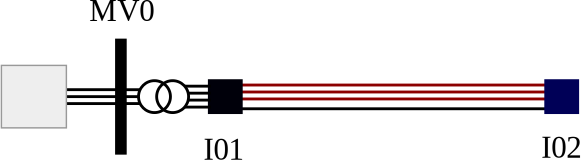

In [ ]:
#s = model2svg(model,data,'https://tinyurl.com/cigreind')
s = model2svg(model,data,'cigre_eu_lv_ind.svg')
s.set_text('MV0_P',f"{model.get_value('p_MV0')/1000:5.2f} kW")
s.save('cigre_eu_lv_ind_results.svg')    
SVG('cigre_eu_lv_ind_results.svg')

### Load change

In [ ]:
model.report_u()

Ratio_a_MV0_I01 = 1.00
Ratio_b_MV0_I01 = 1.00
Ratio_c_MV0_I01 = 1.00
p_load_I02_a =28333.33
q_load_I02_a =17559.42
g_load_I02_a = 0.00
b_load_I02_a = 0.00
p_load_I02_b =28333.33
q_load_I02_b =17559.42
g_load_I02_b = 0.00
b_load_I02_b = 0.00
p_load_I02_c =28333.33
q_load_I02_c =17559.42
g_load_I02_c = 0.00
b_load_I02_c = 0.00
e_ao_m_MV0 =11547.01
e_bo_m_MV0 =11547.01
e_co_m_MV0 =11547.01
phi_MV0 = 0.00
u_freq = 0.00


In [ ]:
model.ini({'p_load_I02_a':50e3, 'q_load_I02_a': 10e3,
           'p_load_I02_b': 0e3, 'q_load_I02_b': 0e3,
           'p_load_I02_c': 0e3, 'q_load_I02_c': 0e3,
           },'xy_0.json')

True

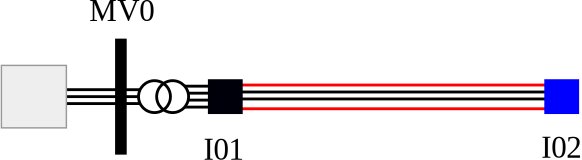

In [ ]:
s = model2svg(model,data,'cigre_eu_lv_ind.svg')
s.set_text('MV0_P',f"{model.get_value('p_MV0')/1000:5.2f} kW")
s.save('cigre_eu_lv_ind_unb.svg')    
SVG('cigre_eu_lv_ind_unb.svg')